## GSoC 2020 Student Application Test
CERN Project: Quantum Machine Learning for High Energy Physics

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import execute, Aer
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

In [2]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

### Task 1
1. Create a circuit with 5 qubits
2. Apply Hadamard operation on every qubit
3. Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
4. SWAP (0, 4)
5. Rotate X with pi/2
6. Plot the circuit

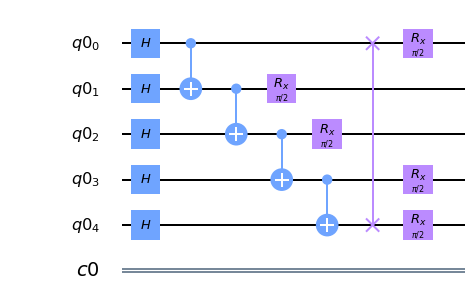

In [3]:
q = QuantumRegister(5)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)

all_qubits = [i for i in range(5)]

circuit.h(all_qubits)
circuit.cx(all_qubits[:-1], all_qubits[1:])
circuit.swap(0, 4)
circuit.rx(np.pi / 2, all_qubits)

circuit.draw()

### Task 2
Create a circuit that is a series of small cirq.Rx rotations and plot the probability of measuring the state in the |0⟩ state. For example, for a qubit, at first, you can rotate 0.1 degree, you get one probability of measuring the state in the |0⟩ state; then you rotate another 0.1 degree in addition, you get another probability; then you another 0.1 degree and so on.

In [4]:
simulator = Aer.get_backend('qasm_simulator')

probabilities = []
angles = np.arange(0, 180, 0.1)

shots_amount = 100
for angle in angles:
    q = QuantumRegister(1)
    c = ClassicalRegister(1)
    circuit = QuantumCircuit(q, c)
    
    circuit.rx(angle * np.pi / 180, 0)
    circuit.measure(0, 0)

    job = execute(circuit, simulator, shots = shots_amount)
    result = job.result().get_counts(circuit)
    if '0' in result.keys():
        probability = result['0'] / shots_amount * 100
        probabilities.append(probability)
    else: 
        probabilities.append(0)

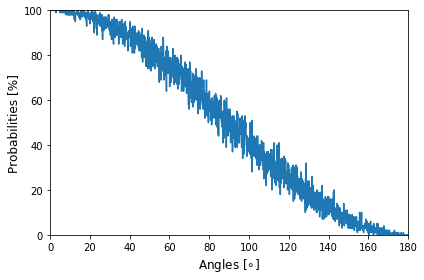

In [5]:
import matplotlib.pyplot as plt

plt.plot(angles, probabilities)

plt.xlim(0, 180)
plt.ylim(0, 100)

plt.xlabel('Angles [$\circ$]', fontsize=12)
plt.ylabel('Probabilities [%]', fontsize=12)

plt.tight_layout()

#### State vectors for different rotation angles

In [6]:
state_simulator = Aer.get_backend('statevector_simulator')

def getStateForRotationAngle(angle):
    q = QuantumRegister(1)
    c = ClassicalRegister(1)
    circuit = QuantumCircuit(q, c)

    circuit.rx(angle * np.pi / 180, 0)

    job = execute(circuit, state_simulator)

    result = job.result()
    state = result.get_statevector(circuit)
    
    return state

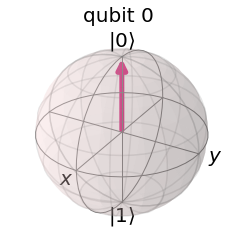

In [7]:
plot_bloch_multivector(getStateForRotationAngle(0))

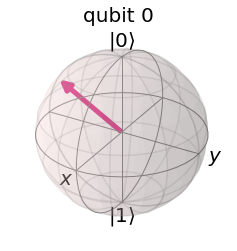

In [8]:
plot_bloch_multivector(getStateForRotationAngle(60))

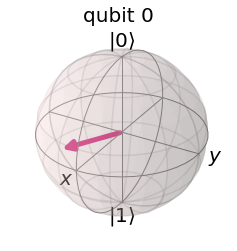

In [9]:
plot_bloch_multivector(getStateForRotationAngle(120))

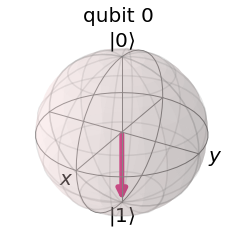

In [10]:
plot_bloch_multivector(getStateForRotationAngle(180))